In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Abaixo temos três conjuntos de dados diferentes que nos mostra formato de distribuições diferentes:


* **Idade de Aposentadoria** Coletamos dados de idade de aposentadoria de uma amostra, e ao analisar o histograma dessas idades, observamos que há uma concentração na faixa média de idades, mas algumas pessoas aposentam mais cedo.

* **Tempo de vida de uma lâmpada**: é essencial para garantir qualidade, eficiência energética e planejar estratégias de manutenção. Sabendo como uma lâmpada vive podemos oferecer garantias confiáveis, é esperado que poucas lampadas de tempo de vida curto (falhas prematuras), com um tempo de vida grande diminui a probabilidade de a lâmpada durar.

* **Altura de funcionários**: Compreender a distribuição das alturas dos funcionários é crucial para a concepção de um ambiente de trabalho ergonômico. Isso ajuda na adaptação de estações de trabalho, cadeiras e equipamentos para garantir conforto e eficiência.

In [2]:

# idade de aponsentadoria
dados_idade_aposentadoria = pd.read_csv("./Data/dados_idade_aposentadoria.csv")

# Tempo de Vida de uma Lâmpada
dados_vida_lampada = pd.read_csv("./Data/dados_vida_lampada.csv")

# Altura dos funcionarios
dados_alturas = pd.read_csv("./Data/dados_alturas.csv")

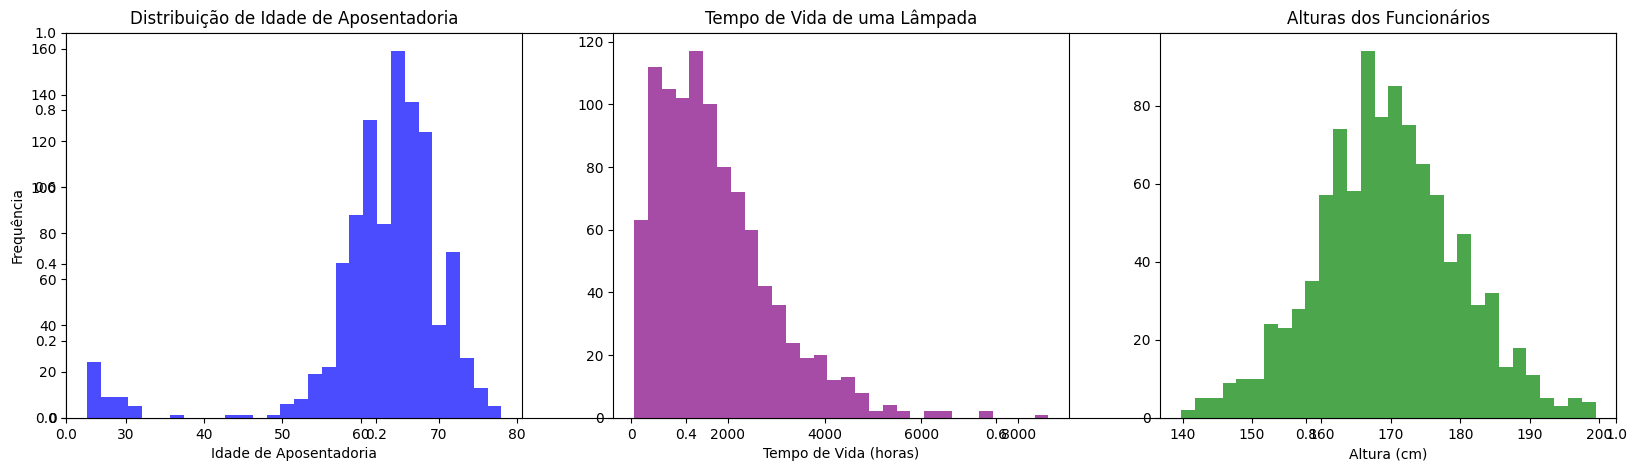

In [3]:
# Várias distribuições
plt.subplots(figsize=(20, 5))
plt.subplot(131)
plt.title('Distribuição de Idade de Aposentadoria')
plt.xlabel('Idade de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(dados_idade_aposentadoria, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(dados_vida_lampada, bins=30, alpha=0.7, color='purple')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel('Tempo de Vida (horas)')

plt.subplot(133)
plt.hist(dados_alturas, bins=30, alpha=0.7, color='green')
plt.title('Alturas dos Funcionários')
plt.xlabel('Altura (cm)')

plt.show()

In [4]:
# Reamostragens

# tamanho da amostra
n = 100
# quantidade de amostras
qnt = 100000

# função de reamostragem e cálculo de médias
def reamostragem_media(dados, coluna, n, qnt):
    medias = [dados[coluna].sample(n, replace=True).mean() for _ in range(qnt)]
    return medias

In [5]:
# Realizando as reamostragens com a função
medias_idade = reamostragem_media(dados_idade_aposentadoria, 'idade', n, 1000)
medias_duracao = reamostragem_media(dados_vida_lampada, 'duracao', n, qnt)
medias_altura = reamostragem_media(dados_alturas, 'alturas', n, qnt)

In [6]:
print("*****  Médias populacionais *****")
print("idade:", dados_idade_aposentadoria['idade'].mean())
print("duração:", dados_vida_lampada['duracao'].mean())
print("altura:", dados_alturas['alturas'].mean())

*****  Médias populacionais *****
idade: 62.70857142857143
duração: 1731.8036029420002
altura: 169.52022


In [7]:
def Average(lst):
    return sum(lst) / len(lst)

print("*****  Médias pamostrais *****")
print("idade:", Average(medias_idade))
print("duração:", Average(medias_duracao))
print("altura:", Average(medias_altura))

*****  Médias pamostrais *****
idade: 62.703509999999966
duração: 1732.3679058787784
altura: 169.52418250000252


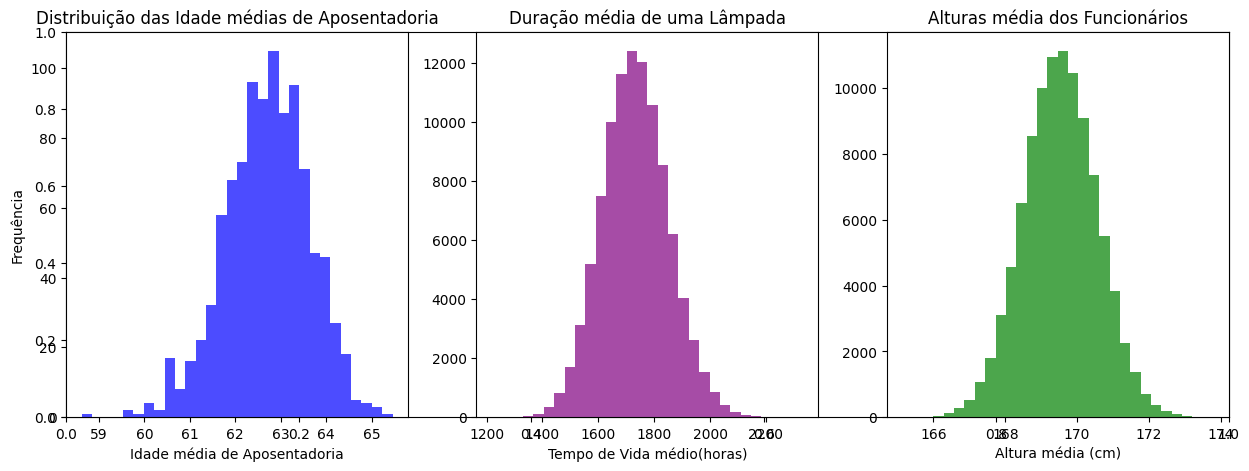

In [8]:
plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(medias_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(medias_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(medias_altura, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()

******

In [9]:
# média da nova amostra
media_nova_amostra = 1200

# media original
media_populacional = dados_vida_lampada['duracao'].mean()

print(media_nova_amostra)
print(media_populacional)

1200
1731.8036029420002


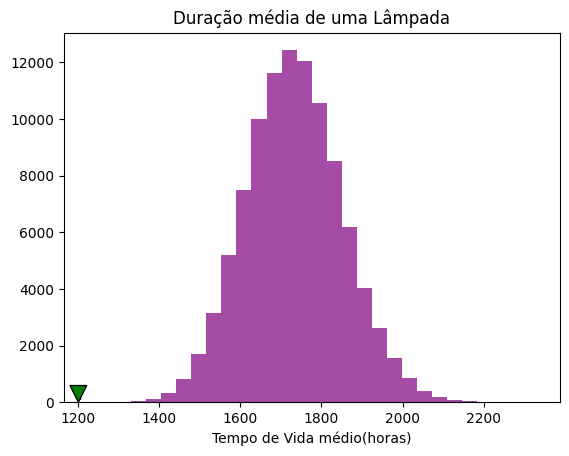

In [10]:
# Quão distante essa média está do comportamento?

plt.hist(medias_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [11]:
# transformando medias_duração em DataFrame
duracao_amostras = pd.DataFrame({'medias_duracao': medias_duracao})

In [12]:
# calculando informações
media_das_medias = duracao_amostras['medias_duracao'].mean()
EP = duracao_amostras['medias_duracao'].std()

print("*****  Medidas amostrais *****")
print("média:", media_das_medias )
print("Erro Padrão:", EP )


*****  Medidas amostrais *****
média: 1732.3679058787634
Erro Padrão: 118.5764138914877


In [13]:
# Quantos erros?
1732 - 3*EP

np.float64(1376.270758325537)

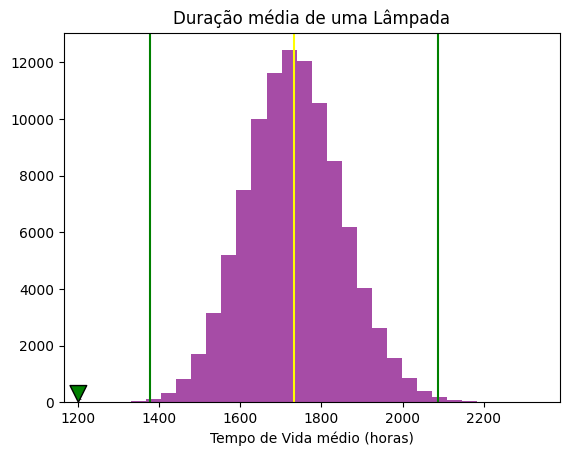

In [14]:
# Visualizando a quantidade de amostras entre 3EP +- da média.

plt.hist(medias_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio (horas)')
plt.axvline(media_das_medias, color = "yellow")
plt.axvline(media_das_medias + 3*EP , color = "green")
plt.axvline(media_das_medias - 3*EP , color = "green")
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [15]:
#quanto está no intervalo de +ou- dois desvio
qnt_obs = duracao_amostras[(duracao_amostras>media_das_medias - 3*EP) &
                          (duracao_amostras<media_das_medias + 3*EP)].count()
# quanto isso representa?
qnt_obs/duracao_amostras.count()*100

medias_duracao    99.715
dtype: float64

In [18]:
from scipy import stats

# nível de confiança definido
confianca = 0.95

In [19]:
#informações para o IC

media = dados_vida_lampada['duracao'].mean()
desvio_padrao_amostral = dados_vida_lampada['duracao'].std()
tamanho_amostra = len(dados_vida_lampada)

In [22]:
# Calculando intervalo de confiança

intervalo_confianca = stats.norm.interval(confianca,
                                       loc=media ,
                                       scale=desvio_padrao_amostral/np.sqrt(tamanho_amostra))

print(f'Intervalo de Confiança ({confianca*100}%): {intervalo_confianca}')


Intervalo de Confiança (95.0%): (np.float64(1658.3741665835487), np.float64(1805.2330393004518))


In [23]:
# hipotese nula
hipotese_duracao_média = 1570

Estabelecidas as hipóteses,

$H_0 : \mu = 1570$\
$H_1 : \mu \neq 1570$

podemos identificar o critério para rejeitar ou não a hipótese estabelecida, mas antes vamos conhecer nossa região crítica, o critério de rejeição.

In [27]:
# dados amostrais
amostra_lampada = pd.read_csv("./Data/experimento_lampadas_natalinas.csv")

#média amostral
media_amostral = amostra_lampada['duracao'].mean()

In [28]:
media_amostral

np.float64(1529.5081310675512)

In [29]:
#informações para a região crítica

confianca = 0.95 # Nível de confiança desejado
desvio_padrao_populacional = 105 #sigma dado pela fabrica
tamanho_amostra = len(amostra_lampada)

In [31]:
#calculando o IC
from scipy import stats
intervalo_confianca = stats.norm.interval(confianca,
                                       loc=1600 ,
                                       scale=(desvio_padrao_populacional^2)/np.sqrt(tamanho_amostra))

print(f'Intervalo de Confiança ({confianca}%): {intervalo_confianca}')

Intervalo de Confiança (0.95%): (np.float64(1579.0283853654214), np.float64(1620.9716146345786))


  Calculando a média amostral, obtemos 1530.30 horas, esse valor não está contido na região de aceitação. Ou seja, Não podemos dizer que a duração média das lampadas é 1570 à 95% de confiança.

  Mas qual a probabilidade de estar rejeitando incorretamente Ho? Para isso precisamos entender os erros associados a essa dicisão.

In [33]:
# nível de significancia: quando você rejeita erroneamente a hipótese nula quando ela é realmente verdadeira.
confianca
nivel_significancia = round(1-confianca,2) # risco de 5% de rejeitar a hipótese nula, mesmo que ela seja verdadeira.
nivel_significancia

0.05

In [39]:
from statsmodels.stats.weightstats import ztest

In [40]:
stat, p_valor = ztest(x1=amostra_lampada['duracao'], value= 1570, alternative='two-sided')

In [41]:
amostra_lampada['duracao'].mean()

np.float64(1529.5081310675512)

In [42]:
# Exibe os resultados
print(f"Estatística Z: {stat}") # quantos desvios padrões estão acima/abaixo da média assumida
print(f"Valor-p: {p_valor}")


Estatística Z: -45.732770207263556
Valor-p: 0.0


In [43]:
# Verifica a hipótese nula com base no valor-p
if p_valor < 0.05:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"


print("Conclusão:", conclusao)

Conclusão: Rejeitar a hipótese nula



**Estatística Z:** O valor da estatística Z é -2.63, Isso indica que a média da amostra está cerca de 2,63 desvios padrão abaixo da média populacional assumida na hipótese nula. O sinal negativo sugere que a média da amostra está abaixo da média populacional hipotética.



 **P-valor: 0.008**: Isso representa a probabilidade de obter uma estatística Z tão ou mais extrema do que a observada, assumindo que a hipótese nula é verdadeira. Há uma probabilidade de 0.8% de observarmos uma média de amostra tão ou mais discrepante da média hipotética.


In [44]:
# Tempo de resposta em minutos para 25 solicitações de suporte
tempo_resposta = [28, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 24, 29, 30]

Estabelecidas as hipóteses:

$H_0 : \mu = 30$\
$H_1 : \mu \leq 30$

Seguimos para o teste, e dessa vez não temos informação sobre a população, Qual teste podemos seguir?

## Aplicando o Teste T


Quando não temos informações sobre a variabilidade da nossa população, sobretudo quando nossa amostra é pequena. Seguimos com um teste t, que segue o mesmo princípio do teste z.


In [45]:
#média coletada do tempo
np.mean(tempo_resposta)

np.float64(29.96)

In [46]:
#importando ttest_1samp
from scipy.stats import ttest_1samp

In [47]:
# Realiza o teste t unilateral para uma amostra
stat, p_value = ttest_1samp(tempo_resposta, 30, alternative='less')

# Exibe os resultados
print(f"Estatística do teste: {stat}")
print(f"Valor-p: {p_value}")

Estatística do teste: -0.10506930292746224
Valor-p: 0.4585970095667924


In [48]:
nivel_significancia = 0.05 #alpha


if p_value < nivel_significancia:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"


conclusao

'Não rejeita a hipótese nula'

# Teste para duas amostras

In [49]:
vendas_com_propaganda = [329.80,  291.70,  338.86,  391.38,
                         285.95,  285.95,  394.75,  346.05,
                         271.83,  332.55,  272.19,  272.06,
                         314.52,  185.20,  196.50,  266.26,
                         239.23,  318.85,  245.52,  215.26,
                         387.94,  286.45,  304.05,  214.52,
                         267.34,  306.66,  230.94,  322.54,
                         263.96,  282.50,  263.90,  411.14,
                         299.19,  236.54,  349.35,  226.75,
                         312.53,  182.42,  220.31,  311.81,
                         344.31,  310.28,  293.06,  281.93,
                         211.29,  256.81,  272.36,  363.43,
                         320.62,  194.22]



In [50]:
vendas_sem_propaganda = [304.44,  261.89,  244.38,  321.70,
                         346.86,  340.88,  234.65,  266.45,
                         304.88,  343.53,  256.25,  273.86,
                         218.62,  213.23,  333.75,  366.37,
                         280.68,  345.21,  306.70,  246.29,
                         306.68,  377.28,  282.85,  378.88,
                         127.82,  334.31,  290.22,  267.06,
                         290.51,  165.74,  271.82,  306.43,
                         373.67,  253.90,  236.49,  254.89,
                         339.92,  304.73,  253.21,  315.80,
                         290.82,  343.12,  242.88,  265.34,
                         261.47,  197.19,  302.77,  300.66,
                         285.31,  270.92]



In [51]:
# média com
print(np.mean(vendas_com_propaganda))
# média sem
print(np.mean(vendas_sem_propaganda))

286.4712
286.0662


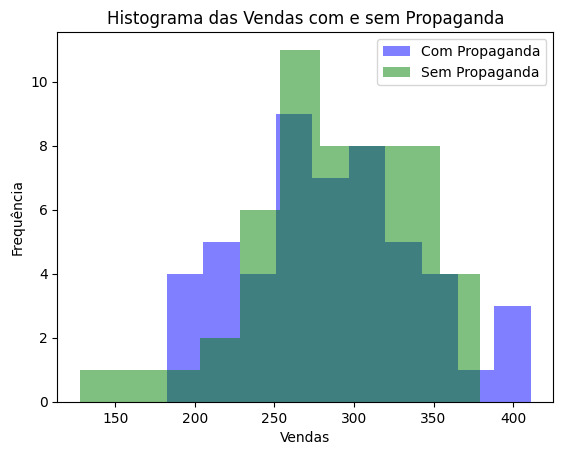

In [52]:
# Criar histogramas
plt.hist(vendas_com_propaganda,  alpha=0.5, color='blue', label='Com Propaganda')
plt.hist(vendas_sem_propaganda,  alpha=0.5, color='green', label='Sem Propaganda')

# Adicionar rótulos e título
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Histograma das Vendas com e sem Propaganda')
plt.legend()
plt.show()

Hipóteses desse teste de amostras independentes:\
H_0: media sem = media com\
H_1: media sem < media com

In [53]:
#teste t para amostras independentes (ttest_ind)
from scipy.stats import ttest_ind


In [54]:
# Aplicação do teste t de Student para amostras independentes
statistic, p_value = ttest_ind(vendas_com_propaganda, vendas_sem_propaganda, alternative='greater')


In [55]:
# Exibição dos resultados
print(f"Estatística do teste: {statistic}")
print(f"Valor-p: {p_value}")

# Interpretação dos resultados
alpha = 0.05
if p_value < alpha:
    print("Rejeitar a hipótese nula: Há evidências de que a propaganda tem um efeito positivo nas vendas.")
else:
    print("Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas devido à propaganda.")

Estatística do teste: 0.03731421838932492
Valor-p: 0.48515518670338376
Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas devido à propaganda.


In [56]:
antes_do_treinamento = [78, 65, 75, 80, 85, 88, 79, 81, 76, 84]
apos_o_treinamento = [85, 70, 75, 87, 90, 92, 84, 82, 76, 91]

In [57]:
# Comparando antes e depois
resultado_subtracao = [b - a for a, b in zip(antes_do_treinamento,apos_o_treinamento)]

print(resultado_subtracao)

[7, 5, 0, 7, 5, 4, 5, 1, 0, 7]


Hipóteses desse teste de amostras pareadas:\
$H_0: μ_d = 0$\
$H_1: μ_d > 0 $

$μ_d$ é média das diferenças dos pares.

In [58]:
#importando o teste pareado ttest_rel
from scipy.stats import ttest_rel

In [59]:
# Aplicando o teste t pareado
statistic, p_value = ttest_rel(apos_o_treinamento, antes_do_treinamento, alternative='greater')
print(f'Estatística do teste t pareado: {statistic}')
print(f'Valor-p: {p_value}')

Estatística do teste t pareado: 4.619361962060379
Valor-p: 0.000627744161772394


# Testes não paramétricos

## Limitações dos testes paramétricos

* Dados com outliers influentes
* Não faz pressupostos para distribuição
* Usados quando temos amostras muitos pequenas, e não conseguimos identificar a distribuição dos dados
* Análise qualitativa

## Aplicando teste de Mann-Whitney



In [60]:
# Dados de desempenho dos dois grupos
treino_a = [5, 3, 8, 4, 6]
treino_b = [4, 2, 7, 5, 3]

In [61]:
# Importando teste mannwhitneyu
from scipy.stats import mannwhitneyu

$H_0:$ As distribuições das duas populações são iguais.\
$H_1:$ As distribuições das duas populações são diferentes.

In [62]:
# Aplicando o teste de Mann-Whitney

statistic, p_value = mannwhitneyu(treino_a, treino_b, alternative='two-sided')
print(f'Estatística do teste de Mann-Whitney: {statistic}')
print(f'Valor-p: {p_value}')

Estatística do teste de Mann-Whitney: 16.5
Valor-p: 0.4605966187047713


## Utilizando o teste de Wilcoxon

In [63]:
# Preferências dos consumidores antes e depois da mudança no layout
preferencias_antes = [4, 2, 5, 2, 5, 6, 7, 8, 9, 10 ]
preferencias_depois = [8, 5, 3, 5, 8, 9, 9, 9, 10, 9]


In [64]:
#diferenças de percepção
resultado_subtracao = [b - a for a, b in zip(preferencias_antes,preferencias_depois)]

print(resultado_subtracao)

[4, 3, -2, 3, 3, 3, 2, 1, 1, -1]


In [65]:
#Média e mediana
print(np.mean(resultado_subtracao))
print(np.median(resultado_subtracao))

1.7
2.5


$H_0$: A mediana das diferenças entre os pares é zero.\
$H_1$: A mediana das diferenças entre os pares não é zero.

In [66]:
# Importando teste de wilcoxon
from scipy.stats import wilcoxon

In [67]:
# Realiza o teste de Wilcoxon para amostras pareadas
stat, p_value = wilcoxon(preferencias_depois, preferencias_antes, alternative = "greater")

# Exibe os resultados
print(f"Estatística do teste: {stat}")
print(f"Valor-p: {p_value}")

#Ho:  Não há diferença entre os grupos, nesse caso, à um nível de significância de 5% então há uma mudança na percepção do layout

Estatística do teste: 48.5
Valor-p: 0.0185546875
